In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin, clone
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df = pd.read_csv("C:\\Users\\User\\Desktop\\Statistical leraning I\\Final project\\online_shoppers_intention.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
print(df.duplicated().sum())
df=df.drop_duplicates()
df.shape

125


(12205, 18)

In [4]:
X = df.drop(['Revenue'], axis = 1)
y = df['Revenue']

In [5]:
class AddNewVariables(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X['Administrative_Duration_Page'] = X['Administrative_Duration']/df['Administrative']
        X['Informational_Duration_Page'] = X['Informational_Duration']/df['Informational']
        X['ProductRelated_Duration_Page'] = X['ProductRelated_Duration']/df['ProductRelated']
        
        # division by zero becomes zero
        X['Administrative_Duration_Page'] = X['Administrative_Duration_Page'].fillna(0)
        X['Informational_Duration_Page'] = X['Informational_Duration_Page'].fillna(0)
        X['ProductRelated_Duration_Page'] = X['ProductRelated_Duration_Page'].fillna(0)
     
        return X

In [6]:
class DropVariables(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.drop(columns=self.columns_to_drop)

In [7]:
pipe = Pipeline([
    ('add_new_vars', AddNewVariables()),
    ('drop_old_vars', DropVariables(columns_to_drop=['Administrative', 'Informational', 'ProductRelated', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']))  
])

In [8]:
pipe1 = clone(pipe)

In [9]:
X = pipe1.fit_transform(X.copy())

In [10]:
y=LabelEncoder().fit_transform(y)
y.shape

(12205,)

In [11]:
X['Weekend'] = LabelEncoder().fit_transform(X['Weekend'])
     
month_mapping = {
    'Feb': 'Others',
    'Mar': 'Others',
    'Oct': 'Winter',
    'Nov': 'Winter',
    'Dec': 'Winter',
    'May': 'Summer',
    'June': 'Summer',
    'Jul': 'Summer',
    'Aug': 'Summer',
    'Sep': 'Summer'
}

# Map the 'Month' column to categories using the defined mapping
X['Month'] = X['Month'].map(month_mapping)
mapping_month = {'Summer' : 2, 'Winter' : 3,
                 'Others' : 1}

X['Month'] = X['Month'].map(mapping_month)
X

,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Administrative_Duration_Page,Informational_Duration_Page,ProductRelated_Duration_Page
0,0.200000,0.200000,0.000000,0.0,1,1,1,1,1,Returning_Visitor,0,0.000000,0.0,0.000000
1,0.000000,0.100000,0.000000,0.0,1,2,2,1,2,Returning_Visitor,0,0.000000,0.0,32.000000
2,0.200000,0.200000,0.000000,0.0,1,4,1,9,3,Returning_Visitor,0,0.000000,0.0,0.000000
3,0.050000,0.140000,0.000000,0.0,1,3,2,2,4,Returning_Visitor,0,0.000000,0.0,1.333333
4,0.020000,0.050000,0.000000,0.0,1,3,3,1,4,Returning_Visitor,1,0.000000,0.0,62.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.007143,0.029031,12.241717,0.0,3,4,6,1,1,Returning_Visitor,1,48.333333,0.0,33.656447
12326,0.000000,0.021333,0.000000,0.0,3,3,2,1,8,Returning_Visitor,1,0.000000,0.0,93.150000
12327,0.083333,0.086667,0.000000,0.0,3,3,2,1,13,Returning_Visitor,1,0.000000,0.0,30.708333
12328,0.000000,0.021053,0.000000,0.0,3,2,2,3,11,Returning_Visitor,0,18.750000,0.0,23.066667


In [12]:
import pandas as pd



# Define the values to be replaced and their replacements
replace_values = {5: 3,4:1, 6: 3, 7: 4, 8: 3, 9: 4, 10: 3, 11: 4, 12: 4, 13: 4}

# Replace the values in the 'TrafficType' column
X['Browser'] = X['Browser'].replace(replace_values)
X


,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Administrative_Duration_Page,Informational_Duration_Page,ProductRelated_Duration_Page
0,0.200000,0.200000,0.000000,0.0,1,1,1,1,1,Returning_Visitor,0,0.000000,0.0,0.000000
1,0.000000,0.100000,0.000000,0.0,1,2,2,1,2,Returning_Visitor,0,0.000000,0.0,32.000000
2,0.200000,0.200000,0.000000,0.0,1,4,1,9,3,Returning_Visitor,0,0.000000,0.0,0.000000
3,0.050000,0.140000,0.000000,0.0,1,3,2,2,4,Returning_Visitor,0,0.000000,0.0,1.333333
4,0.020000,0.050000,0.000000,0.0,1,3,3,1,4,Returning_Visitor,1,0.000000,0.0,62.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.007143,0.029031,12.241717,0.0,3,4,3,1,1,Returning_Visitor,1,48.333333,0.0,33.656447
12326,0.000000,0.021333,0.000000,0.0,3,3,2,1,8,Returning_Visitor,1,0.000000,0.0,93.150000
12327,0.083333,0.086667,0.000000,0.0,3,3,2,1,13,Returning_Visitor,1,0.000000,0.0,30.708333
12328,0.000000,0.021053,0.000000,0.0,3,2,2,3,11,Returning_Visitor,0,18.750000,0.0,23.066667


In [13]:
replace_values = {5: 4,2:1,3:2,4:2, 6: 3, 7: 5, 8: 4, 9: 5, 10: 3, 11: 4, 12: 5, 13: 3, 14: 5, 15: 5, 16: 5, 17: 5, 18: 5, 19: 5, 20: 5}

# Replace the values in the 'TrafficType' column
X['TrafficType'] = X['TrafficType'].replace(replace_values)

In [14]:
# Map the 'Month' column to categories using the defined mapping

mapping_month = {'Returning_Visitor' : 2, 'New_Visitor' : 1,
                 'Other' : 3}

X['VisitorType'] = X['VisitorType'].map(mapping_month)
X

,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Administrative_Duration_Page,Informational_Duration_Page,ProductRelated_Duration_Page
0,0.200000,0.200000,0.000000,0.0,1,1,1,1,1,2,0,0.000000,0.0,0.000000
1,0.000000,0.100000,0.000000,0.0,1,2,2,1,1,2,0,0.000000,0.0,32.000000
2,0.200000,0.200000,0.000000,0.0,1,4,1,9,2,2,0,0.000000,0.0,0.000000
3,0.050000,0.140000,0.000000,0.0,1,3,2,2,2,2,0,0.000000,0.0,1.333333
4,0.020000,0.050000,0.000000,0.0,1,3,3,1,2,2,1,0.000000,0.0,62.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.007143,0.029031,12.241717,0.0,3,4,3,1,1,2,1,48.333333,0.0,33.656447
12326,0.000000,0.021333,0.000000,0.0,3,3,2,1,4,2,1,0.000000,0.0,93.150000
12327,0.083333,0.086667,0.000000,0.0,3,3,2,1,3,2,1,0.000000,0.0,30.708333
12328,0.000000,0.021053,0.000000,0.0,3,2,2,3,4,2,0,18.750000,0.0,23.066667


In [15]:
replace_values = [4,5, 6, 7, 8]
replacement_value = 5

# Replace the values in the 'Browser' column
X['OperatingSystems'] = X['OperatingSystems'].replace(replace_values, replacement_value)
X

,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Administrative_Duration_Page,Informational_Duration_Page,ProductRelated_Duration_Page
0,0.200000,0.200000,0.000000,0.0,1,1,1,1,1,2,0,0.000000,0.0,0.000000
1,0.000000,0.100000,0.000000,0.0,1,2,2,1,1,2,0,0.000000,0.0,32.000000
2,0.200000,0.200000,0.000000,0.0,1,5,1,9,2,2,0,0.000000,0.0,0.000000
3,0.050000,0.140000,0.000000,0.0,1,3,2,2,2,2,0,0.000000,0.0,1.333333
4,0.020000,0.050000,0.000000,0.0,1,3,3,1,2,2,1,0.000000,0.0,62.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.007143,0.029031,12.241717,0.0,3,5,3,1,1,2,1,48.333333,0.0,33.656447
12326,0.000000,0.021333,0.000000,0.0,3,3,2,1,4,2,1,0.000000,0.0,93.150000
12327,0.083333,0.086667,0.000000,0.0,3,3,2,1,3,2,1,0.000000,0.0,30.708333
12328,0.000000,0.021053,0.000000,0.0,3,2,2,3,4,2,0,18.750000,0.0,23.066667


In [16]:
#pip install --upgrade imbalanced-learn scikit-learn

In [17]:
pip install prince

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
from prince import FAMD
X

,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Administrative_Duration_Page,Informational_Duration_Page,ProductRelated_Duration_Page
0,0.200000,0.200000,0.000000,0.0,1,1,1,1,1,2,0,0.000000,0.0,0.000000
1,0.000000,0.100000,0.000000,0.0,1,2,2,1,1,2,0,0.000000,0.0,32.000000
2,0.200000,0.200000,0.000000,0.0,1,5,1,9,2,2,0,0.000000,0.0,0.000000
3,0.050000,0.140000,0.000000,0.0,1,3,2,2,2,2,0,0.000000,0.0,1.333333
4,0.020000,0.050000,0.000000,0.0,1,3,3,1,2,2,1,0.000000,0.0,62.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.007143,0.029031,12.241717,0.0,3,5,3,1,1,2,1,48.333333,0.0,33.656447
12326,0.000000,0.021333,0.000000,0.0,3,3,2,1,4,2,1,0.000000,0.0,93.150000
12327,0.083333,0.086667,0.000000,0.0,3,3,2,1,3,2,1,0.000000,0.0,30.708333
12328,0.000000,0.021053,0.000000,0.0,3,2,2,3,4,2,0,18.750000,0.0,23.066667


In [19]:
import pandas as pd
from prince import FAMD

In [20]:
X
import prince
famd = prince.FAMD(
    n_components=2,
    n_iter=5,
    copy=True,
    check_input=True,
    random_state=1000,
    engine="sklearn",
    handle_unknown="error"  # same parameter as sklearn.preprocessing.OneHotEncoder
)
famd = famd.fit(X)
#handle_unknown="error"

In [21]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,6.936,7.93%,7.93%
1,6.264,7.16%,15.09%


In [22]:
factor_coordinates=famd.row_coordinates(X)
factor_coordinates

component,0,1
0,-0.083328,4.614030
1,-0.922235,-1.055989
2,5.677408,2.127870
3,-1.230449,-1.515554
4,-1.043752,-0.110383
...,...,...
12325,2.652263,0.734501
12326,-0.250632,-0.965197
12327,-0.819329,-2.569324
12328,-0.142000,-0.807505


In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=100)
clusters = kmeans.fit_predict(factor_coordinates)

In [24]:
X_with_clusters = X.copy()  # Assuming X is your original DataFrame
X_with_clusters['Cluster'] = clusters

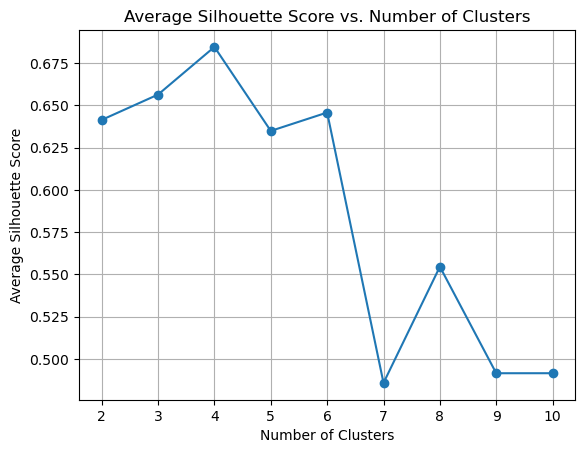

In [25]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

cluster_range = range(2, 11)  # You can adjust this range

# Initialize lists to store the number of clusters and corresponding silhouette scores
num_clusters = []
silhouette_scores = []

# Iterate over different numbers of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    clusters = kmeans.fit_predict(factor_coordinates)
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(factor_coordinates, clusters)
    
    # Append the number of clusters and silhouette score to lists
    num_clusters.append(n_clusters)
    silhouette_scores.append(silhouette_avg)

# Plot the number of clusters against the average silhouette score
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

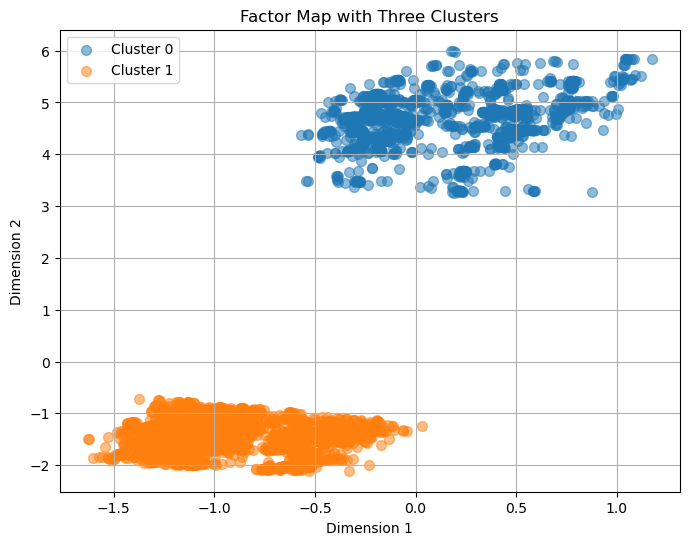

In [27]:
plt.figure(figsize=(8, 6))
for cluster_label in range(2):
    plt.scatter(factor_coordinates.iloc[clusters == cluster_label, 0], 
                factor_coordinates.iloc[clusters == cluster_label, 1], 
                label=f'Cluster {cluster_label}', alpha=0.5, marker='o', s=50)
plt.title('Factor Map with Three Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True)
plt.show()

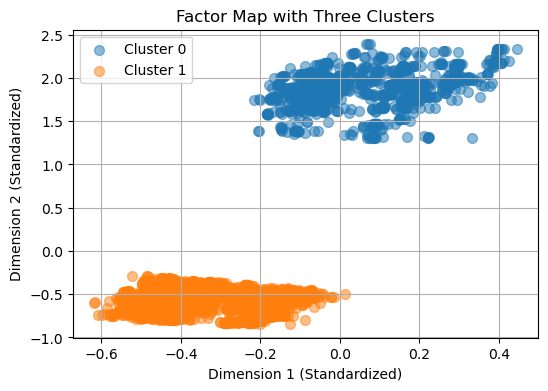

In [28]:
standardized_coordinates = (factor_coordinates - factor_coordinates.mean()) / factor_coordinates.std()

# Plot the factor map with three clusters
plt.figure(figsize=(6, 4))
for cluster_label in range(2):
    plt.scatter(standardized_coordinates.iloc[clusters == cluster_label, 0], 
                standardized_coordinates.iloc[clusters == cluster_label, 1], 
                label=f'Cluster {cluster_label}', alpha=0.5, marker='o', s=50)
plt.title('Factor Map with Three Clusters')
plt.xlabel('Dimension 1 (Standardized)')
plt.ylabel('Dimension 2 (Standardized)')
plt.legend()
plt.grid(True)
plt.show()

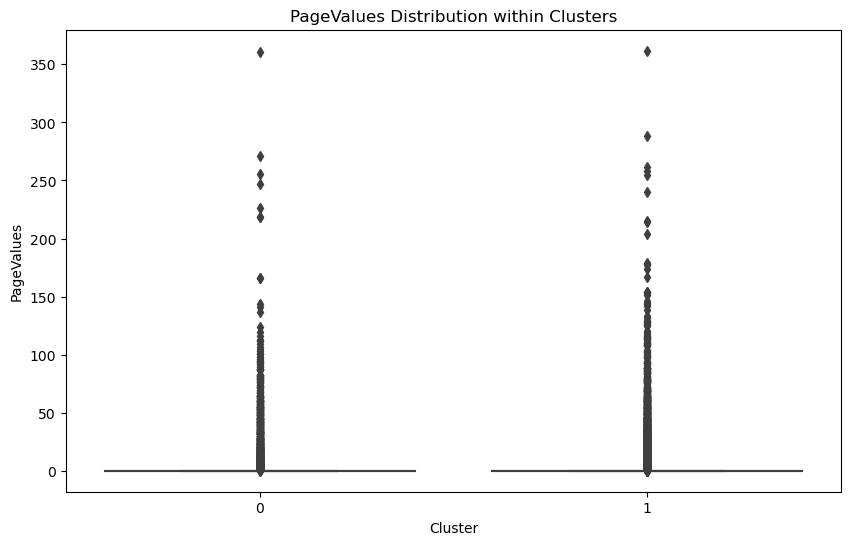

In [27]:
import seaborn as sns

# Assuming X_with_clusters contains the original DataFrame with cluster labels
# Assuming 'PageValues' is the column name for the continuous variable

# Add 1 to cluster labels to start from 1
#X_with_clusters['Cluster'] += 1

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_with_clusters, x='Cluster', y='PageValues')
plt.title('PageValues Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('PageValues')
plt.show()

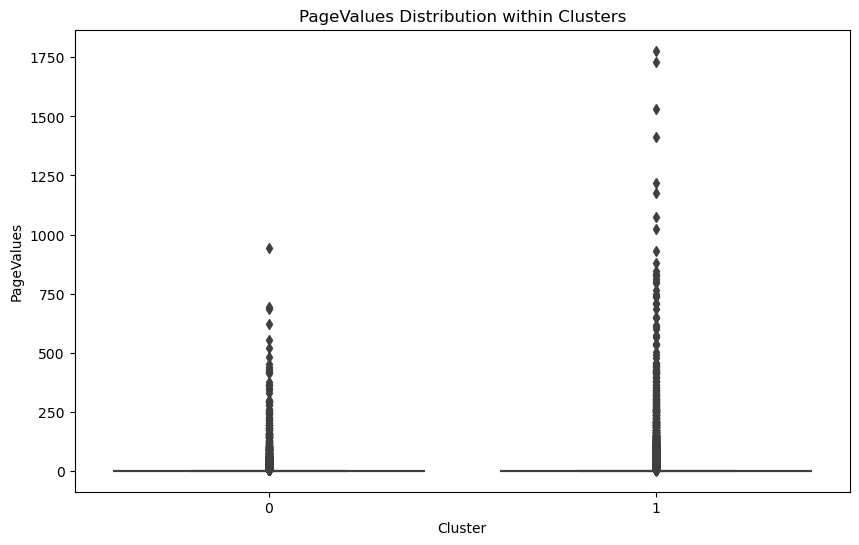

In [28]:
import seaborn as sns

# Assuming X_with_clusters contains the original DataFrame with cluster labels
# Assuming 'PageValues' is the column name for the continuous variable

# Add 1 to cluster labels to start from 1
#X_with_clusters['Cluster'] += 1

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_with_clusters, x='Cluster', y='Informational_Duration_Page')
plt.title('PageValues Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('PageValues')
plt.show()

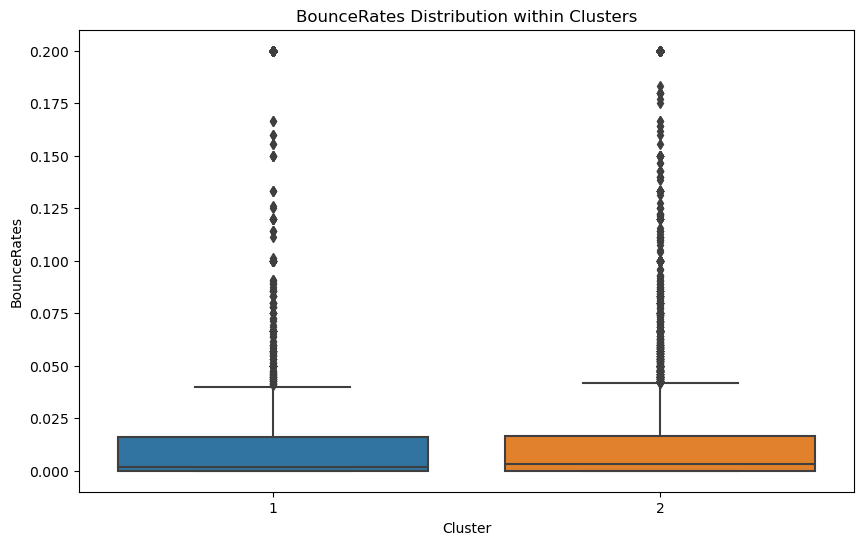

In [29]:
import seaborn as sns

X_with_clusters['Cluster'] += 1
X_with_clusters['Cluster'] = X_with_clusters['Cluster'].replace({4: 1, 5: 2, 6: 3})

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_with_clusters, x='Cluster', y='BounceRates')
plt.title('BounceRates Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('BounceRates')
plt.show()

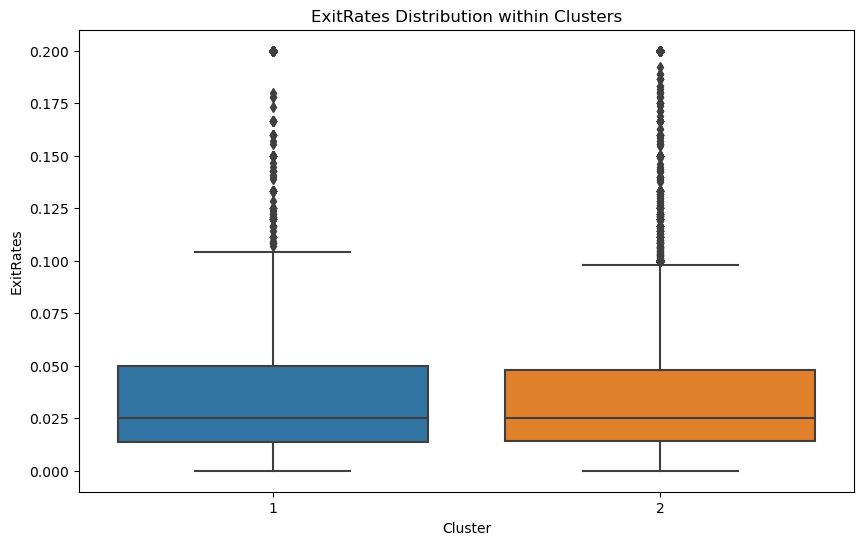

In [30]:
import seaborn as sns



# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_with_clusters, x='Cluster', y='ExitRates')
plt.title('ExitRates Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('ExitRates')
plt.show()

<Figure size 1000x600 with 0 Axes>

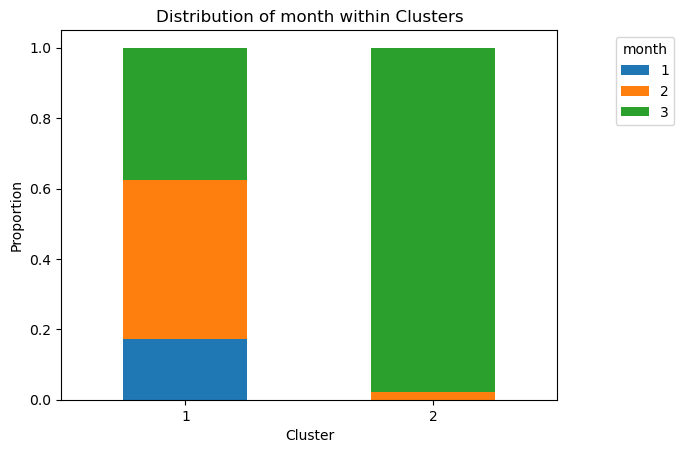

In [31]:
import pandas as pd
import seaborn as sns

# Convert X and y to DataFrames if they are not already
X_df = pd.DataFrame(X, columns=[ 'Administrative_Duration_Page', 'Informational_Duration_Page',  'ProductRelated_Duration_Page','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend'])  # Replace X_column_names with actual column names if available
y_series = pd.Series(y, name='Revenue')

X_df.reset_index(drop=True, inplace=True)
y_series.reset_index(drop=True, inplace=True)

# Combine X_df, y_series, and cluster labels
data = pd.concat([X_df, y_series], axis=1)
data['Cluster'] = clusters  # Assuming 'clusters' contains the cluster labels

cluster_indices = clusters < 2  # Assuming there are only three clusters labeled as 0, 1, and 2
filtered_data = data[cluster_indices]

cluster_1_data = data[data['Cluster'] == 1]
cluster_2_data = data[data['Cluster'] == 2]


# Concatenate the data for the three clusters
filtered_data = pd.concat([cluster_1_data, cluster_2_data])
cluster_revenue_counts = filtered_data.groupby(['Cluster', 'Month']).size().unstack(fill_value=0)

# Normalize the counts within each cluster
cluster_revenue_counts_normalized = cluster_revenue_counts.div(cluster_revenue_counts.sum(axis=1), axis=0)

# Plot the stacked bar plot

plt.figure(figsize=(10, 6))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Distribution of month within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='month', loc='upper right',bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

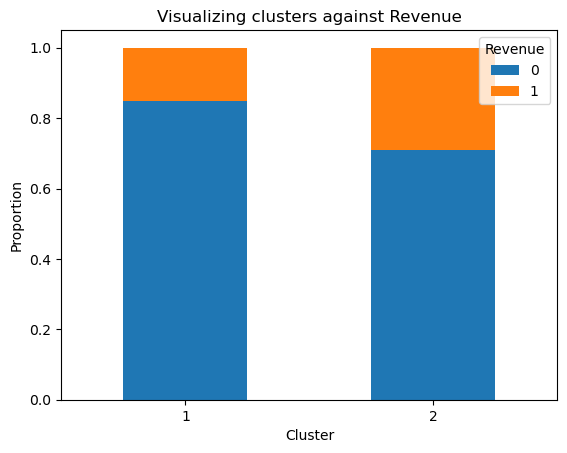

In [32]:
cluster_revenue_counts = filtered_data.groupby(['Cluster', 'Revenue']).size().unstack(fill_value=0)

# Normalize the counts within each cluster
cluster_revenue_counts_normalized = cluster_revenue_counts.div(cluster_revenue_counts.sum(axis=1), axis=0)

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Visualizing clusters against Revenue')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Revenue', loc='upper right')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

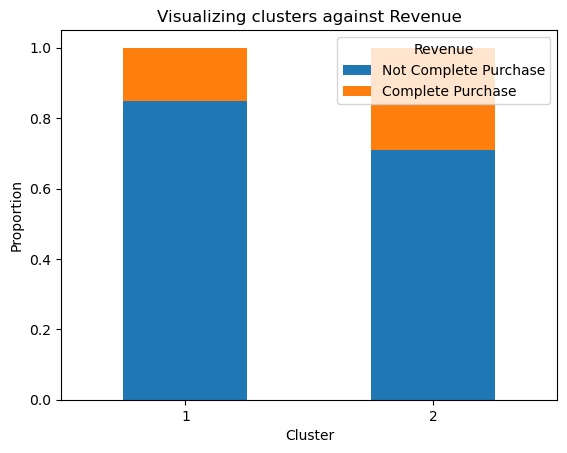

In [33]:
revenue_labels = {
    0: 'Not Complete Purchase',
    1: 'Complete Purchase'
}

# Replace numerical categories with labels in the legend
legend_labels = [revenue_labels[col] for col in cluster_revenue_counts_normalized.columns]

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Visualizing clusters against Revenue')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Revenue', labels=legend_labels, loc='upper right')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

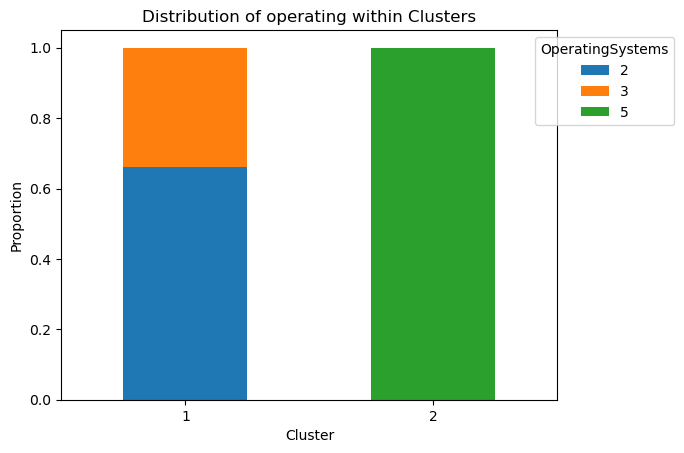

In [34]:
cluster_revenue_counts = filtered_data.groupby(['Cluster', 'OperatingSystems']).size().unstack(fill_value=0)

# Normalize the counts within each cluster
cluster_revenue_counts_normalized = cluster_revenue_counts.div(cluster_revenue_counts.sum(axis=1), axis=0)

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Distribution of operating within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='OperatingSystems', loc='upper right',bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

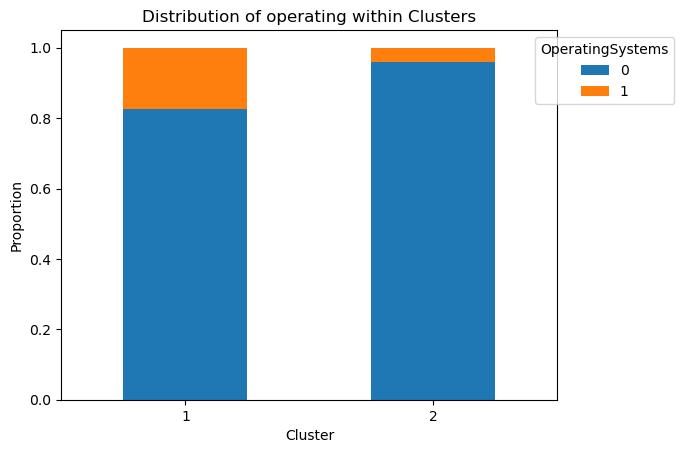

In [35]:
cluster_revenue_counts = filtered_data.groupby(['Cluster', 'Weekend']).size().unstack(fill_value=0)

# Normalize the counts within each cluster
cluster_revenue_counts_normalized = cluster_revenue_counts.div(cluster_revenue_counts.sum(axis=1), axis=0)

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Distribution of operating within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='OperatingSystems', loc='upper right',bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

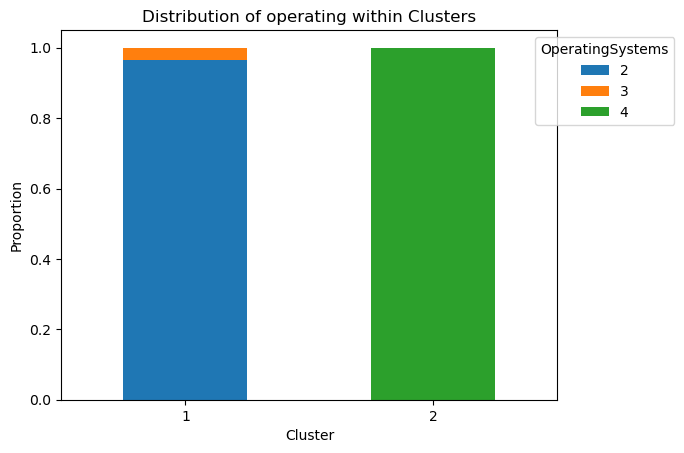

In [36]:
cluster_revenue_counts = filtered_data.groupby(['Cluster', 'Browser']).size().unstack(fill_value=0)

# Normalize the counts within each cluster
cluster_revenue_counts_normalized = cluster_revenue_counts.div(cluster_revenue_counts.sum(axis=1), axis=0)

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Distribution of operating within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='OperatingSystems', loc='upper right',bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

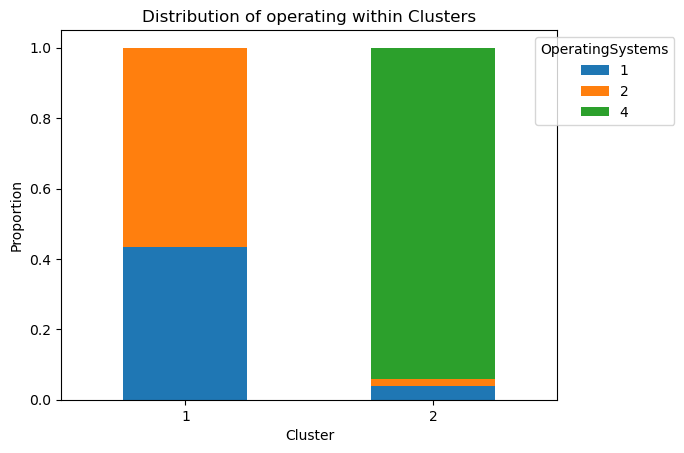

In [108]:
cluster_revenue_counts = filtered_data.groupby(['Cluster', 'TrafficType']).size().unstack(fill_value=0)

# Normalize the counts within each cluster
cluster_revenue_counts_normalized = cluster_revenue_counts.div(cluster_revenue_counts.sum(axis=1), axis=0)

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Distribution of operating within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='OperatingSystems', loc='upper right',bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

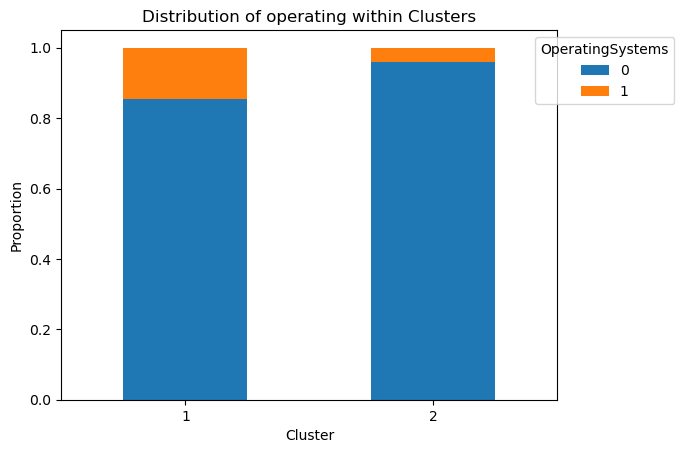

In [46]:
cluster_revenue_counts = filtered_data.groupby(['Cluster', 'Weekend']).size().unstack(fill_value=0)

# Normalize the counts within each cluster
cluster_revenue_counts_normalized = cluster_revenue_counts.div(cluster_revenue_counts.sum(axis=1), axis=0)

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Distribution of operating within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='OperatingSystems', loc='upper right',bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

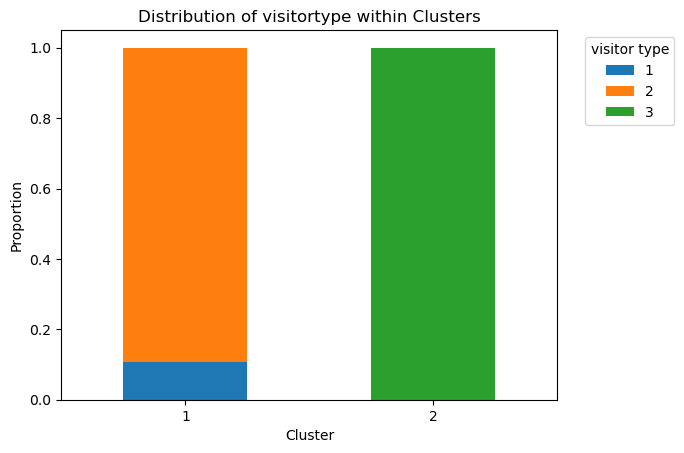

In [47]:
cluster_revenue_counts = filtered_data.groupby(['Cluster', 'VisitorType']).size().unstack(fill_value=0)

# Normalize the counts within each cluster
cluster_revenue_counts_normalized = cluster_revenue_counts.div(cluster_revenue_counts.sum(axis=1), axis=0)

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Distribution of visitortype within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='visitor type', loc='upper right',bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

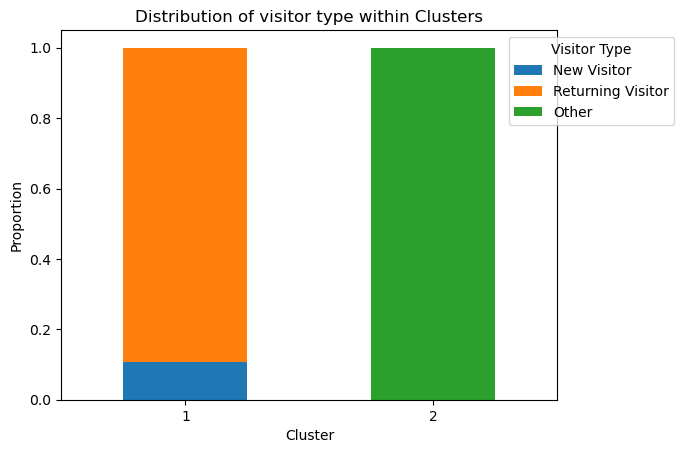

In [48]:
visitor_type_labels = {
    1: 'New Visitor',
    2: 'Returning Visitor',
    3: 'Other'
}

# Replace numerical categories with labels in the legend
legend_labels = [visitor_type_labels[int(label)] for label in cluster_revenue_counts_normalized.columns]

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Distribution of visitor type within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Visitor Type', labels=legend_labels, loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

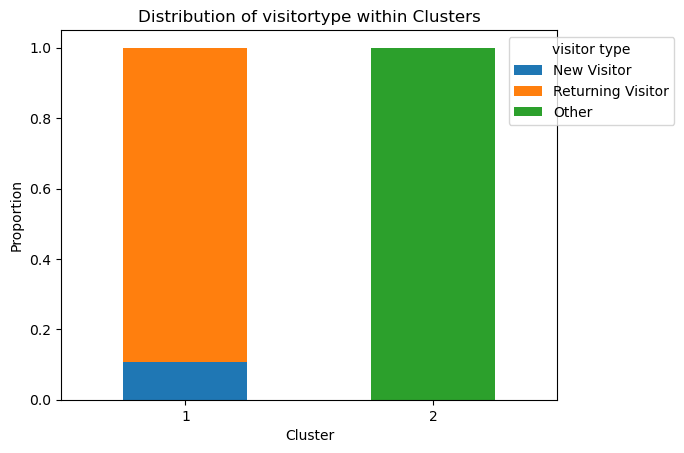

In [51]:
visitor_type_labels = {
    1: 'New Visitor',
    2: 'Returning Visitor',
    3: 'Other'
}

# Replace numerical categories with labels in the legend
legend_labels = [visitor_type_labels[int(label)] for label in cluster_revenue_counts_normalized.columns]

cluster_revenue_counts = filtered_data.groupby(['Cluster', 'VisitorType']).size().unstack(fill_value=0)

# Normalize the counts within each cluster
cluster_revenue_counts_normalized = cluster_revenue_counts.div(cluster_revenue_counts.sum(axis=1), axis=0)

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Distribution of visitortype within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='visitor type', labels=legend_labels ,loc='upper right',bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

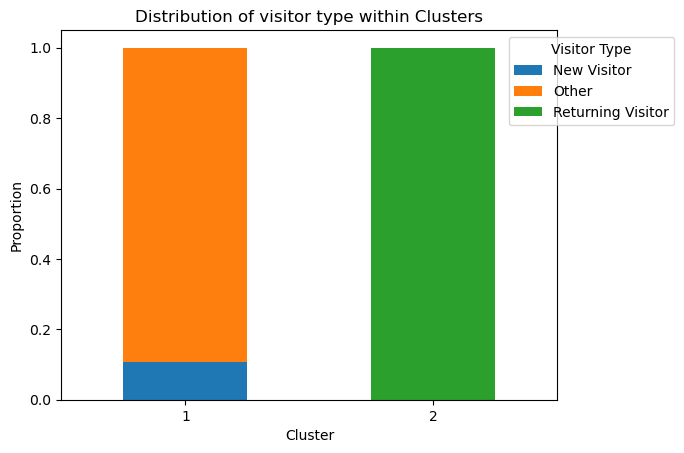

In [52]:
visitor_type_labels = {
    1: 'New Visitor',
    3: 'Returning Visitor',
    2: 'Other'
}

# Replace numerical categories with labels in the legend
legend_labels = [visitor_type_labels[int(label)] for label in cluster_revenue_counts_normalized.columns]

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Distribution of visitor type within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Visitor Type', labels=legend_labels, loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

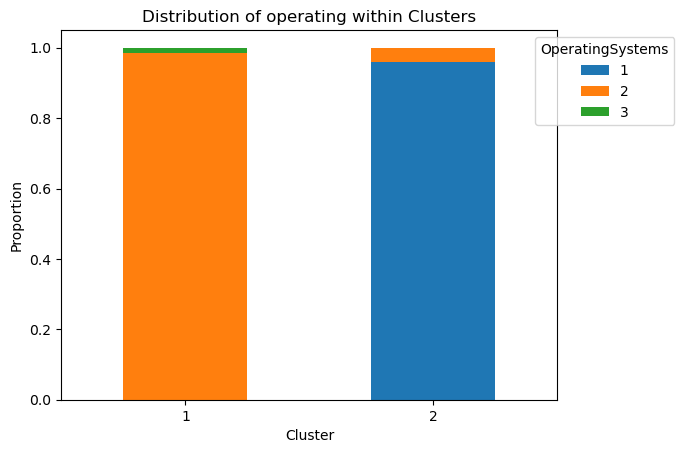

In [55]:
cluster_revenue_counts = filtered_data.groupby(['Cluster', 'Browser']).size().unstack(fill_value=0)

# Normalize the counts within each cluster
cluster_revenue_counts_normalized = cluster_revenue_counts.div(cluster_revenue_counts.sum(axis=1), axis=0)

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Distribution of operating within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='OperatingSystems', loc='upper right',bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

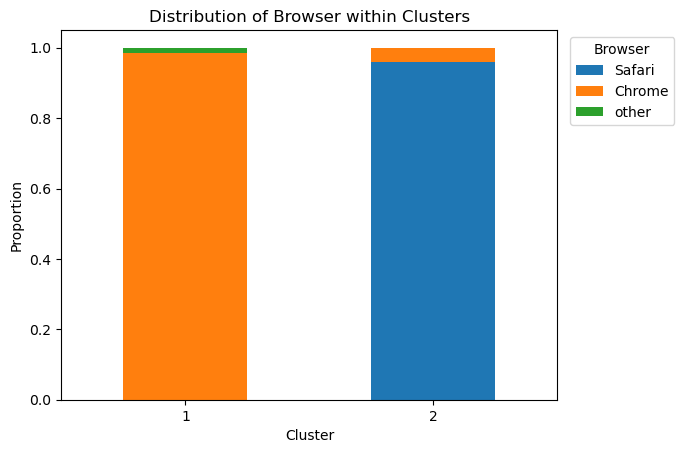

In [111]:
visitor_type_labels = {
    2: 'Chrome',
    1: 'Safari',
    4: 'Firefox',
    3:'other'
}

# Replace numerical categories with labels in the legend
legend_labels = [visitor_type_labels[int(label)] for label in cluster_revenue_counts_normalized.columns]


# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Distribution of Browser within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Browser',labels=legend_labels, loc='upper right',bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

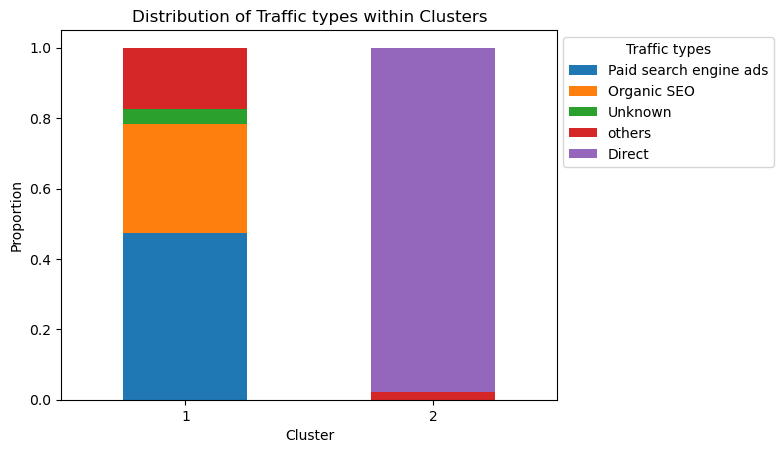

In [272]:
visitor_type_labels = {
    2: 'Organic SEO',
    1: 'Paid search engine ads',
    5: 'Direct',
    3:'Unknown',
    4:'others'
}

# Replace numerical categories with labels in the legend
legend_labels = [visitor_type_labels[int(label)] for label in cluster_revenue_counts_normalized.columns]


# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Distribution of Traffic types within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Traffic types',labels=legend_labels, loc='upper right',bbox_to_anchor=(1.45, 1))
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

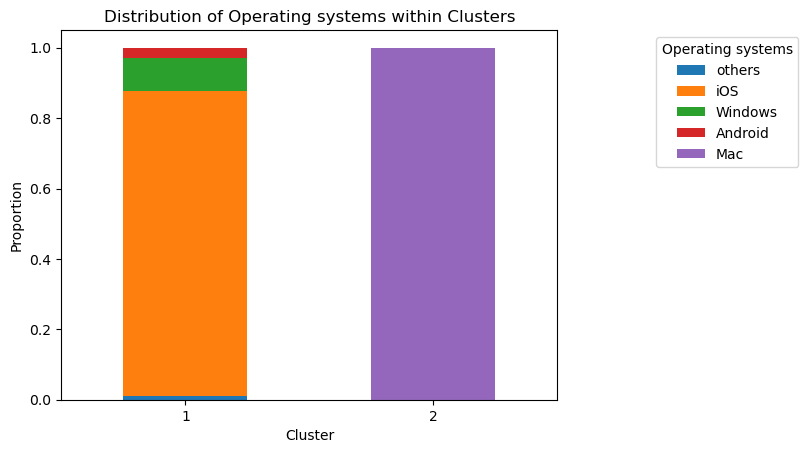

In [262]:
visitor_type_labels = {
    5: 'Mac',
    4: 'Android',
    1: 'others',
    3:'Windows',
    2:'iOS'
}

# Replace numerical categories with labels in the legend
legend_labels = [visitor_type_labels[int(label)] for label in cluster_revenue_counts_normalized.columns]


# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Distribution of Operating systems within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Operating systems',labels=legend_labels, loc='upper right',bbox_to_anchor=(1.5, 1))
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

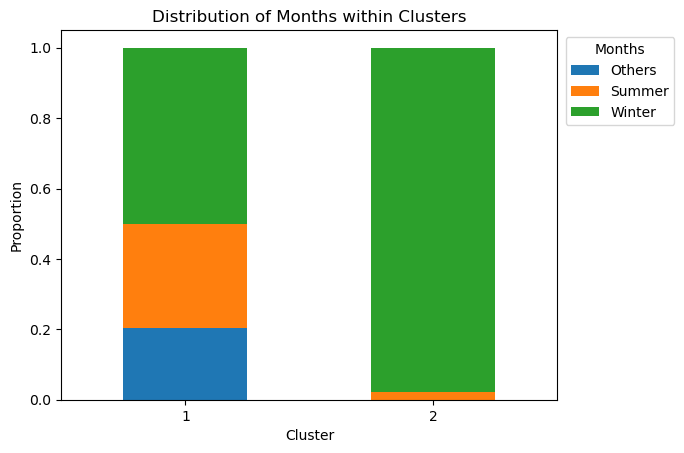

In [266]:
visitor_type_labels = {
    2: 'Summer',
    1:'Others',
    3:'Winter'
}

# Replace numerical categories with labels in the legend
legend_labels = [visitor_type_labels[int(label)] for label in cluster_revenue_counts_normalized.columns]


# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cluster_revenue_counts_normalized.plot(kind='bar', stacked=True)
plt.title('Distribution of Months within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Months',labels=legend_labels, loc='upper right',bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=0)
plt.show()